                                                CREHANA
                         Proyecto final EDA con Python - Instructor: Richard Rivas
                                    Alumno: Christian Farnast Contardo

### 1. Carga de librerias

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 2. Importación del dataset

In [4]:
df = pd.read_csv('levels_fyi_salary_data.csv')

In [5]:
df.head()

,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,...,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,Race,Education
0,6/7/2017 11:33:27,Oracle,L3,Product Manager,127000,"Redwood City, CA",1.5,1.5,NaN,107000.0,...,0,0,0,0,0,0,0,0,NaN,NaN
1,6/10/2017 17:11:29,eBay,SE 2,Software Engineer,100000,"San Francisco, CA",5.0,3.0,NaN,0.0,...,0,0,0,0,0,0,0,0,NaN,NaN
2,6/11/2017 14:53:57,Amazon,L7,Product Manager,310000,"Seattle, WA",8.0,0.0,NaN,155000.0,...,0,0,0,0,0,0,0,0,NaN,NaN
3,6/17/2017 0:23:14,Apple,M1,Software Engineering Manager,372000,"Sunnyvale, CA",7.0,5.0,NaN,157000.0,...,0,0,0,0,0,0,0,0,NaN,NaN
4,6/20/2017 10:58:51,Microsoft,60,Software Engineer,157000,"Mountain View, CA",5.0,3.0,NaN,0.0,...,0,0,0,0,0,0,0,0,NaN,NaN


In [18]:
df.tail()

,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,...,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,Race,Education
62637,9/9/2018 11:52:32,Google,T4,Software Engineer,327000,"Seattle, WA",10.0,1.0,Distributed Systems (Back-End),155000.0,...,0,0,0,0,0,0,0,0,188000.0,188000.0
62638,9/13/2018 8:23:32,Microsoft,62,Software Engineer,237000,"Redmond, WA",2.0,2.0,Full Stack,146900.0,...,0,0,0,0,0,0,0,0,188000.0,188000.0
62639,9/13/2018 14:35:59,MSFT,63,Software Engineer,220000,"Seattle, WA",14.0,12.0,Full Stack,157000.0,...,0,0,0,0,0,0,0,0,188000.0,188000.0
62640,9/16/2018 16:10:35,Salesforce,Lead MTS,Software Engineer,280000,"San Francisco, CA",8.0,4.0,iOS,194688.0,...,0,0,0,0,0,0,0,0,188000.0,188000.0
62641,1/29/2019 5:12:59,apple,ict3,Software Engineer,200000,"Sunnyvale, CA",0.0,0.0,ML / AI,155000.0,...,0,0,0,0,0,0,0,0,188000.0,188000.0


### 3. Deteccion de valores faltantes y respectivos reemplazos

In [6]:
# Veamos cuantos valores perdidos hay
df.isnull().sum()

timestamp                      0
company                        5
level                        119
title                          0
totalyearlycompensation        0
location                       0
yearsofexperience              0
yearsatcompany                 0
tag                          854
basesalary                     0
stockgrantvalue                0
bonus                          0
gender                     19540
otherdetails               22505
cityid                         0
dmaid                          2
rowNumber                      0
Masters_Degree                 0
Bachelors_Degree               0
Doctorate_Degree               0
Highschool                     0
Some_College                   0
Race_Asian                     0
Race_White                     0
Race_Two_Or_More               0
Race_Black                     0
Race_Hispanic                  0
Race                       40215
Education                  32272
dtype: int64

In [12]:
# Veamos en profundidad los valores faltantes
# En el caso de company son solo 5 valores faltantes, por cuanto no afecta en demasia el eliminarlos.
df.dropna(subset = 'company', axis = 0, inplace = True)

In [13]:
# si hago una confirmacion para company, arroja cero valores faltantes
df['company'].isnull().sum()

0

In [14]:
# Arreglemos el resto
col_numericas = df.select_dtypes(['float64','int64'])
col_categoricas = df.select_dtypes(['object'])
for i in col_numericas.columns:
    df.fillna(df[i].median(), inplace = True) 
for i in col_categoricas:
    df.fillna(df[i].mode(), inplace = True)

In [15]:
# Chequeo de valores nulos (Checking for missing values)
df.isnull().sum()
#Listo!, sin valores faltantes. (Ready!, no NaN values)

timestamp                  0
company                    0
level                      0
title                      0
totalyearlycompensation    0
location                   0
yearsofexperience          0
yearsatcompany             0
tag                        0
basesalary                 0
stockgrantvalue            0
bonus                      0
gender                     0
otherdetails               0
cityid                     0
dmaid                      0
rowNumber                  0
Masters_Degree             0
Bachelors_Degree           0
Doctorate_Degree           0
Highschool                 0
Some_College               0
Race_Asian                 0
Race_White                 0
Race_Two_Or_More           0
Race_Black                 0
Race_Hispanic              0
Race                       0
Education                  0
dtype: int64

In [17]:
#Hagamos un poco de analisis exploratorio (Let's make some EDA)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62637 entries, 0 to 62641
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   timestamp                62637 non-null  object 
 1   company                  62637 non-null  object 
 2   level                    62637 non-null  object 
 3   title                    62637 non-null  object 
 4   totalyearlycompensation  62637 non-null  int64  
 5   location                 62637 non-null  object 
 6   yearsofexperience        62637 non-null  float64
 7   yearsatcompany           62637 non-null  float64
 8   tag                      62637 non-null  object 
 9   basesalary               62637 non-null  float64
 10  stockgrantvalue          62637 non-null  float64
 11  bonus                    62637 non-null  float64
 12  gender                   62637 non-null  object 
 13  otherdetails             62637 non-null  object 
 14  cityid                

In [21]:
# La variable timestamp no tiene formato de fecha, sin embargo para efectos de estudio no es necesario por cuanto esta 
# columna será borrada.
# Las demas variables tienen formato acorde
df.drop('timestamp', axis = 1, inplace = True)

In [22]:
df.describe()

,totalyearlycompensation,yearsofexperience,yearsatcompany,basesalary,stockgrantvalue,bonus,cityid,dmaid,rowNumber,Masters_Degree,Bachelors_Degree,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic
count,6.263700e+04,62637.000000,62637.000000,6.263700e+04,6.263700e+04,62637.000000,62637.000000,62637.000000,62637.000000,62637.000000,62637.000000,62637.000000,62637.000000,62637.000000,62637.000000,62637.000000,62637.000000,62637.000000,62637.000000
mean,2.163082e+05,7.204279,2.702181,1.366894e+05,5.149019e+04,19335.491734,9856.423823,622.102910,41696.395262,0.245717,0.201207,0.028785,0.005109,0.005668,0.187940,0.128215,0.012836,0.011016,0.018024
std,1.380341e+05,5.840421,3.263748,6.136770e+04,8.187654e+04,26781.835252,6679.232355,1097.785185,24488.752872,0.430515,0.400906,0.167203,0.071294,0.075070,0.390667,0.334332,0.112567,0.104378,0.133041
min,1.000000e+04,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.350000e+05,3.000000,0.000000,1.080000e+05,0.000000e+00,1000.000000,7369.000000,506.000000,20073.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.880000e+05,6.000000,2.000000,1.400000e+05,2.500000e+04,14000.000000,7839.000000,807.000000,42022.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.640000e+05,10.000000,4.000000,1.700000e+05,6.500000e+04,26000.000000,11521.000000,807.000000,63023.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,4.980000e+06,69.000000,69.000000,1.659870e+06,2.800000e+06,1000000.000000,47926.000000,188000.000000,83875.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [23]:
df.describe(include = 'object')

,company,level,title,location,tag,gender,otherdetails,Race,Education
count,62637,62637,62637,62637,62637,62637,62637.0,62637.0,62637.0
unique,1631,2924,15,1050,3059,5,12842.0,6.0,6.0
top,Amazon,L4,Software Engineer,"Seattle, WA",Full Stack,Male,188000.0,188000.0,188000.0
freq,8126,5014,41227,8701,11381,35698,22502.0,40212.0,32269.0


In [27]:
# Las variables 'Race' y 'Education' no tiene mucho valor. Son valores numericos puestos como categóricos (pude cambiar formato)
# Sin embargo, hay otras variables dummies que hacen mencion a estas observaciones. Serán borradas.
# Las otras variables que tampoco aportan valor son 'cityid', 'dmaid' y 'rowNumber', las que tambien serán borradas
df.drop(['Race','Education'], axis = 1, inplace = True)

KeyError: "['Race', 'Education'] not found in axis"

In [26]:
df.drop(['cityid', 'dmaid','rowNumber'], axis = 1, inplace = True)

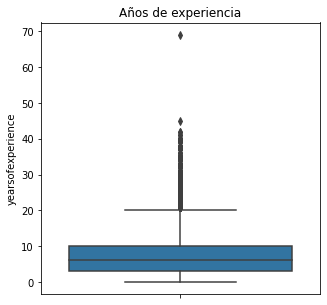

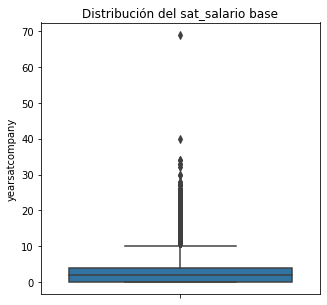

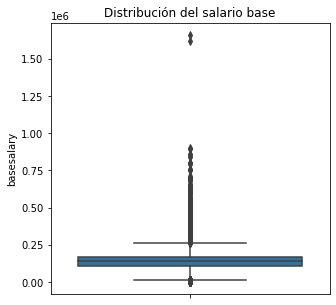

In [47]:
# Las variables 'yearsofexperience'	'yearsatcompany' y	'basesalary' tienen valores muy grandes. Hagamos unos graficos
# para confirmar la situación..

plt.figure(figsize = (5,5))
sns.boxplot(y= df['yearsofexperience'])
plt.title('Años de experiencia')

plt.figure(figsize = (5,5))
sns.boxplot(y= df['yearsatcompany'])
plt.title('Distribución del sat_salario base')

plt.figure(figsize = (5,5))
sns.boxplot(y =df['basesalary'])
plt.title('Distribución del salario base')

plt.show()

In [48]:
# Como se ven en los graficos, tienen valores outliers que deben arreglarse
from scipy.stats.mstats import winsorize

In [49]:
lim_inferior = 0.05
lim_superior = 0.05 #---------dejamos todo en el percentil 95

col_to_winsorize = ['basesalary','yearsatcompany','yearsofexperience']

for col in col_to_winsorize:
    df[col] = winsorize(df[col], limits =[lim_inferior, lim_superior])

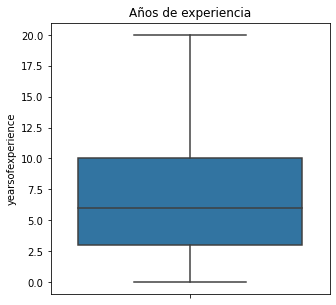

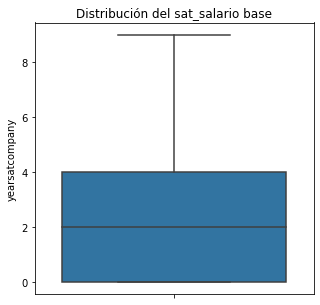

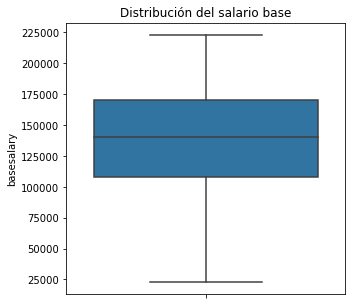

In [50]:
plt.figure(figsize = (5,5))
sns.boxplot(y= df['yearsofexperience'])
plt.title('Años de experiencia')

plt.figure(figsize = (5,5))
sns.boxplot(y= df['yearsatcompany'])
plt.title('Distribución del sat_salario base')

plt.figure(figsize = (5,5))
sns.boxplot(y =df['basesalary'])
plt.title('Distribución del salario base')

plt.show()
#No se observan valores extremos

In [51]:
df.describe()

,totalyearlycompensation,yearsofexperience,yearsatcompany,basesalary,stockgrantvalue,bonus,Masters_Degree,Bachelors_Degree,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic
count,6.263700e+04,62637.000000,62637.000000,62637.000000,6.263700e+04,62637.000000,62637.000000,62637.000000,62637.000000,62637.000000,62637.000000,62637.000000,62637.000000,62637.000000,62637.000000,62637.000000
mean,2.163082e+05,7.086665,2.500407,135081.252375,5.149019e+04,19335.491734,0.245717,0.201207,0.028785,0.005109,0.005668,0.187940,0.128215,0.012836,0.011016,0.018024
std,1.380341e+05,5.487934,2.548782,50815.982842,8.187654e+04,26781.835252,0.430515,0.400906,0.167203,0.071294,0.075070,0.390667,0.334332,0.112567,0.104378,0.133041
min,1.000000e+04,0.000000,0.000000,23000.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.350000e+05,3.000000,0.000000,108000.000000,0.000000e+00,1000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.880000e+05,6.000000,2.000000,140000.000000,2.500000e+04,14000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.640000e+05,10.000000,4.000000,170000.000000,6.500000e+04,26000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,4.980000e+06,20.000000,9.000000,223000.000000,2.800000e+06,1000000.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [87]:
df.describe(include = 'object')

,company,level,title,location,tag,gender,otherdetails
count,62637,62637,62637,62637,62637,62637,62637.0
unique,1631,2924,15,1050,3059,5,12842.0
top,Amazon,L4,Software Engineer,"Seattle, WA",Full Stack,Male,188000.0
freq,8126,5014,41227,8701,11381,35698,22502.0


### 4. Busquedas de Insights

In [52]:
# Ahora que ya tenemos el dataset limpio, procedamos con en analisis de datos de este dataset.
# Continuaremos con la subdivision de este dataset estudiando a los "faang" (facebook,apple, amazon, netflix y google)
# Estudiemos como se comporta la variable 'basesalary' versus 'yearsofexperience', 'gender', 'title', 'company', 
# y 'raza'

In [99]:
def faang_company(company):
    faang = ['Facebook','Apple','Amazon','Netflix', 'Google']
    if company in faang:
        return 1
    else:
        return 0    

In [100]:
df['faang'] = df['company'].apply(faang_company)

In [102]:
df_faang = df[df['faang'] ==1]

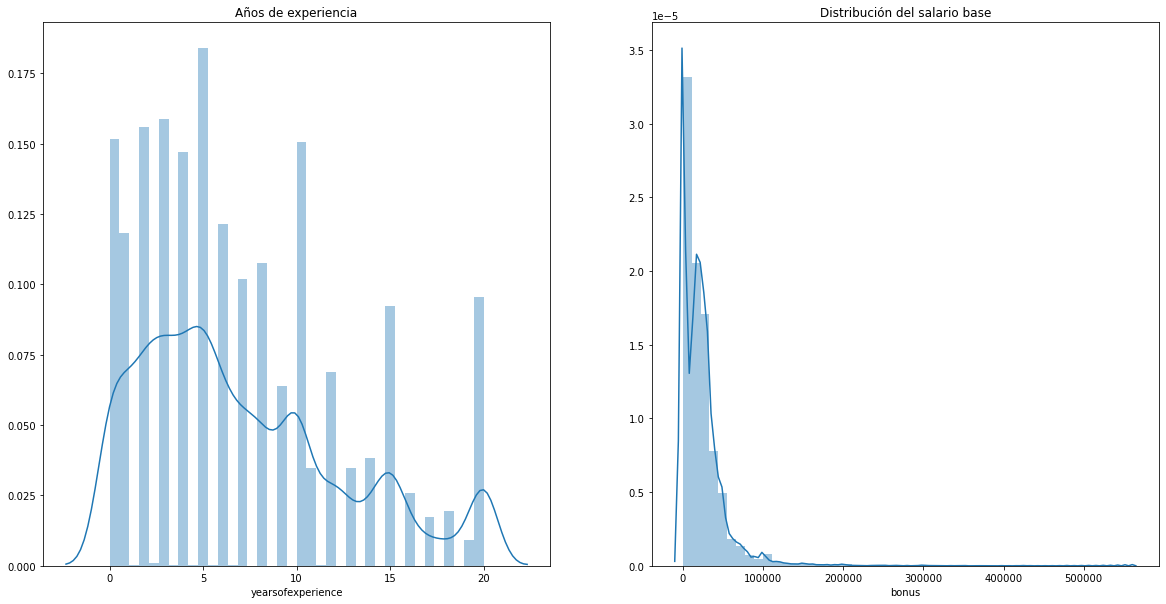

In [119]:
# # ¿Como se distribuyen los años de experiencia y el salario base?
plt.figure(figsize = (20,10))
plt.subplot(1,2,1)
sns.distplot(df_faang['yearsofexperience'])
plt.title('Años de experiencia')

plt.subplot(1,2,2)
sns.distplot(df_faang['bonus'])
plt.title('Distribución del salario base')

plt.show()

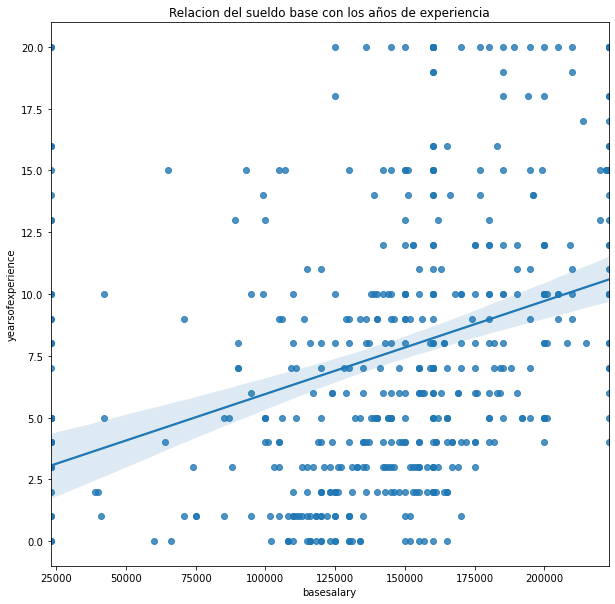

In [128]:
f,ax = plt.subplots(figsize = (10,10))
sns.regplot(data = df_faang.sample(500), x ='basesalary', y='yearsofexperience')
plt.title('Relacion del sueldo base con los años de experiencia')
plt.show()
# Se puede apreciar que hay una relacion directa entre ambas variables, lo cual sería logico. A mas tiempo de experiencia,
# Mayor sueldo

In [143]:
df_faang.groupby('gender')['basesalary'].mean()
#¿Quien es el grupo '188000'?

gender
188000.0    139228.308191
Female      143479.034769
Male        145979.658633
Other       150042.105263
Name: basesalary, dtype: float64

In [149]:
df_faang['gender'].value_counts()
# es un grupo considerable de personas como para borrarlas o asignarlas a otro genero...(&%&/#$%#$#"#"$#"!!!!")

Male        10165
188000.0     5555
Female       1927
Other          95
Name: gender, dtype: int64

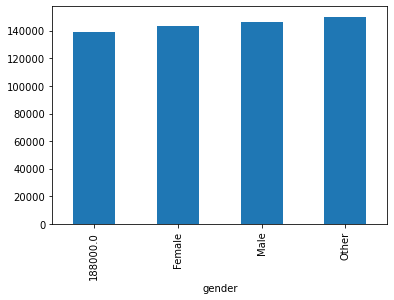

In [151]:
#Veamos como se comporta esta variable con el salario base graficamente mejor...
df_faang.groupby('gender')['basesalary'].mean().plot(kind = 'bar')
plt.show()
# El grupo 188000 entorpece cualquier analisis, como para saber si estas empresas en general hacen alguna distincion por
# genero a la hora de pagar sueldos...

In [ ]:
# Dejando el sinsabor anterior, veamos como les va segun su educacion...


<AxesSubplot:xlabel='Bachelors_Degree'>

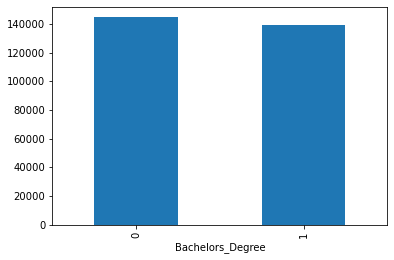

In [152]:
df_faang.groupby('Bachelors_Degree')['basesalary'].mean().plot(kind = 'bar')
#Bachelors_Degree
#0    144465.547157
#1    139264.320221
#Name: basesalary, dtype: float64

<AxesSubplot:xlabel='Masters_Degree'>

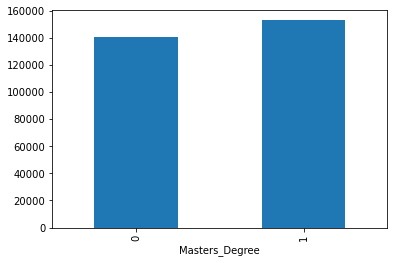

In [153]:
df_faang.groupby(['Masters_Degree'])['basesalary'].mean().plot(kind = 'bar')
#Masters_Degree
#0    140620.450840
#1    152991.620112
#Name: basesalary, dtype: float64

<AxesSubplot:xlabel='Doctorate_Degree'>

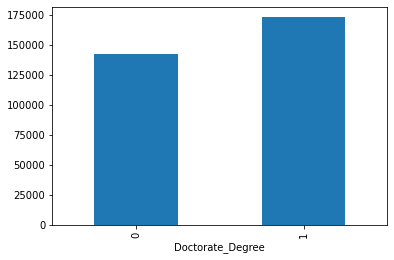

In [155]:
df_faang.groupby(['Doctorate_Degree'])['basesalary'].mean().plot(kind = 'bar')
#Doctorate_Degree
#0    142319.641273
#1    173274.562584
#Name: basesalary, dtype: float64

<AxesSubplot:xlabel='Highschool'>

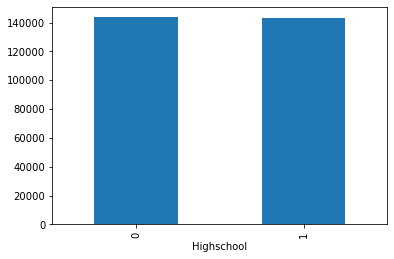

In [158]:
df_faang.groupby(['Highschool'])['basesalary'].mean().plot(kind = 'bar')
#Highschool
#0    143616.558985
#1    143494.117647
#Name: basesalary, dtype: float64

<AxesSubplot:xlabel='Some_College'>

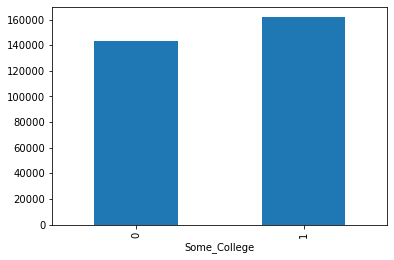

In [160]:
df_faang.groupby(['Some_College'])['basesalary'].mean().plot(kind = 'bar')
#Some_College
#0    143540.331786
#1    161675.675676
#Name: basesalary, dtype: float64

In [ ]:
# Según se aprecia, los sueldos de que no tienen some college, saliendo del high school no tienen una diferencia versus quienes
# empiezan un bachelor, master o doctorado. Quienes poseen un doctorado claramente perciben un mejor sueldo
# pero para empezar, se puede considerar a alguien con conocimientos saliendo del high school, bachelor.

AHORA DESCANSA, ALMUERZA, TOMATE UN TE.....YA SEGUIRAS!

<AxesSubplot:xlabel='title'>

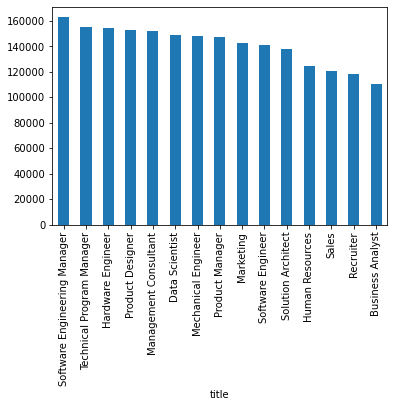

In [173]:
df_faang.groupby(['title'], sort = True)['basesalary'].mean().sort_values(ascending = False).plot(kind = 'bar')
#title
#Business Analyst                110655.813953
#Data Scientist                  148749.216301
#Hardware Engineer               154199.376947
#Human Resources                 124614.173228
#Management Consultant           152424.242424
#Marketing                       142618.604651
#Mechanical Engineer             148069.767442
#Product Designer                152569.565217
#Product Manager                 147753.470790
#Recruiter                       118714.953271
#Sales                           120742.424242
#Software Engineer               141070.602913
#Software Engineering Manager    162776.090828
#Solution Architect              137769.035533
#Technical Program Manager       155587.301587
#Name: basesalary, dtype: float64

# Hay que estudiar para ser un software engineering manager parece.... :P

<AxesSubplot:xlabel='company'>

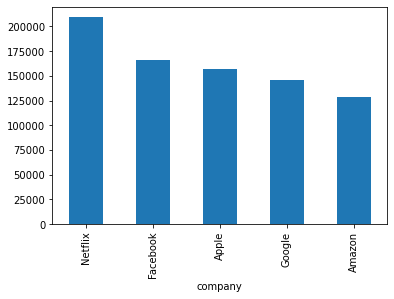

In [176]:
# ¿Quien paga mejor?
df_faang.groupby(['company'], sort = True)['basesalary'].mean().sort_values(ascending = False).plot(kind = 'bar')
#company
#Amazon      128592.788826
#Apple       156962.258383
#Facebook    166155.742475
#Google      145925.046189
#Netflix     209361.940299
#Name: basesalary, dtype: float64

# Netflix paga bastante bien, aunque habria que pensar con todas las personas que han cancelado su suscripcion, mantienen
# ese nivel de sueldo...

In [177]:
#¿Hay alguna distincion por raza?
#Race_Asian	Race_White	Race_Two_Or_More	Race_Black	Race_Hispanic

<AxesSubplot:xlabel='Race_Asian'>

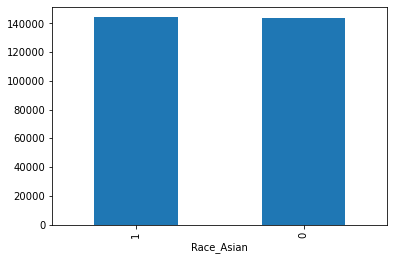

In [182]:
df_faang.groupby(['Race_Asian'])['basesalary'].mean().sort_values(ascending = False).plot(kind = 'bar')
#Race_Asian
#0    143495.475613
#1    144193.664272
#Name: basesalary, dtype: float64

<AxesSubplot:xlabel='Race_White'>

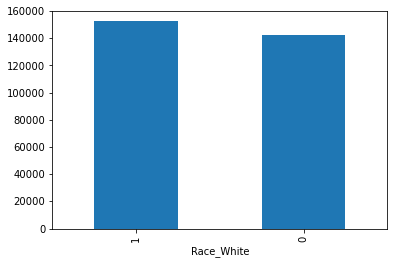

In [184]:
df_faang.groupby(['Race_White'])['basesalary'].mean().sort_values(ascending = False).plot(kind = 'bar')
#Race_White
#0    142507.555485
#1    152434.628975
#Name: basesalary, dtype: float64

<AxesSubplot:xlabel='Race_Two_Or_More'>

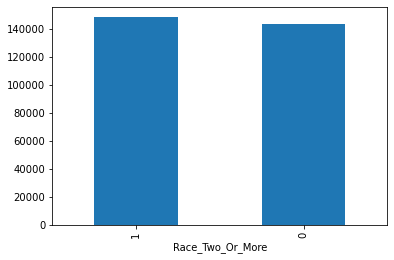

In [188]:
df_faang.groupby(['Race_Two_Or_More'])['basesalary'].mean().sort_values(ascending = False).plot(kind = 'bar')
#Race_Two_Or_More
#0    143554.105005
#1    148566.210046
#Name: basesalary, dtype: float64

In [191]:
df_faang.groupby(['Race_Black'])['basesalary'].mean().sort_values(ascending = False).plot(kind = 'bar')
#Race_Black
#0    143605.909127
#1    144603.351955
#Name: basesalary, dtype: float64

SyntaxError: invalid syntax (4263650139.py, line 3)

<AxesSubplot:xlabel='Race_Hispanic'>

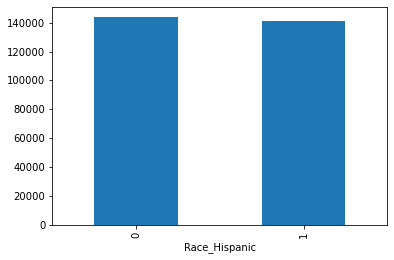

In [198]:
df_faang.groupby(['Race_Hispanic'])['basesalary'].mean().sort_values(ascending = False).plot(kind = 'bar')
#Race_Hispanic
#0    143664.631851
#1    141095.238095
#Name: basesalary, dtype: float64

In [199]:
# La supremacia blanca vence de nuevo, la gente blanca percibe mejor sueldo seguido de los mestizos (dos o mas razas),
# los asiaticos, los negros y finalmente, los hispaños.

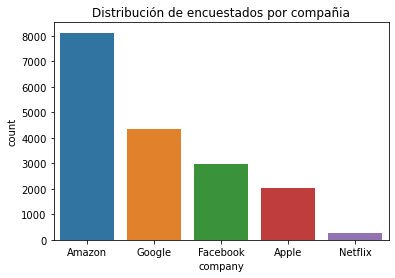

In [202]:
# Participacion por compañia
sns.countplot(data = df_faang, x = 'company', order = df_faang['company'].value_counts().index)
plt.title('Distribución de encuestados por compañia')
plt.show()

In [204]:
df_faang['company'].value_counts()

Amazon      8126
Google      4330
Facebook    2990
Apple       2028
Netflix      268
Name: company, dtype: int64

### 5. Conclusiones